



## **Question6** 




In [ ]:
####Importing Libraires

from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
img_folder = r"/content/images"

In [ ]:
list_img = os.listdir(img_folder)

In [ ]:
img_array = []
for image in sorted(list_img):
    [file_name, ext] = os.path.splitext(image) #file + extension

    # we create arays for our images
    arr = np.array(Image.open(os.path.join(img_folder, image))) 
    arr_dim = arr.ndim ##Number of array dimensions- to findout number of dimensions
    ## if the arr_dim==3 it means we hace RGB image.
    arr_shape = arr.shape ##Tuple of array dimensions.
    [h, w] = np.shape(arr)[0:2]

    arr_mean = np.mean(arr, axis=(0,1))##calculate the mean value for each color channel
    ## we use axis=(0,1) because the calculations should be done for the “x” and “y” axis in array

    ## now we add our values to image_array
    img_array.append([file_name, arr_mean[0], arr_mean[1], arr_mean[2]])

datas = pd.DataFrame(img_array, columns=['Name', 'Red', 'Green', 'Blue'])
datas

,Name,Red,Green,Blue
0,c1,99.342832,113.614983,146.863646
1,c10,171.011949,172.716610,188.238031
2,c11,45.925127,44.929975,50.240636
3,c12,81.862262,103.776071,93.958968
4,c13,95.693808,96.277181,77.880597
...,...,...,...,...
117,m63,90.870490,51.835165,49.745241
118,m64,164.054403,98.920874,101.097524
119,m65,96.577187,78.754863,52.778779
120,m66,106.561280,77.438620,71.205458


In [ ]:
for index, row in datas.iterrows():
    if 'c' in row['Name']:
        datas.loc[index,'Class'] = "Manchester"
        datas.loc[index,'Labels'] = 0
    else:
        datas.loc[index,'Class'] = "Chelsea"
        datas.loc[index,'Labels'] = 1
datas

,Name,Red,Green,Blue,Class,Labels
0,c1,99.342832,113.614983,146.863646,Manchester,0.0
1,c10,171.011949,172.716610,188.238031,Manchester,0.0
2,c11,45.925127,44.929975,50.240636,Manchester,0.0
3,c12,81.862262,103.776071,93.958968,Manchester,0.0
4,c13,95.693808,96.277181,77.880597,Manchester,0.0
...,...,...,...,...,...,...
117,m63,90.870490,51.835165,49.745241,Chelsea,1.0
118,m64,164.054403,98.920874,101.097524,Chelsea,1.0
119,m65,96.577187,78.754863,52.778779,Chelsea,1.0
120,m66,106.561280,77.438620,71.205458,Chelsea,1.0


In [ ]:
X = datas[['Red', 'Green', 'Blue']]
y = datas['Labels']

##first method - Gaussian Naive Bayes





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
clf = GaussianNB()  

# fitting the classifier
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 49.0%


Text(89.18, 0.5, 'predicted label')

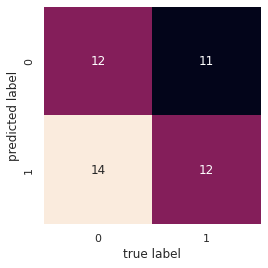

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
confusion_mtx = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.46      0.49        26
         1.0       0.46      0.52      0.49        23

    accuracy                           0.49        49
   macro avg       0.49      0.49      0.49        49
weighted avg       0.49      0.49      0.49        49



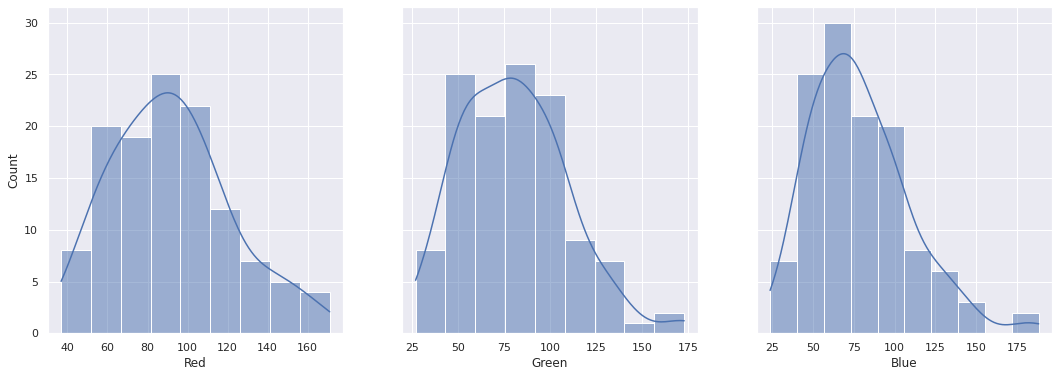

In [ ]:
dataset2 = datas[['Red', 'Green', 'Blue']]		
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(dataset2, ax=axes[0], x="Red", kde=True)
sns.histplot(dataset2, ax=axes[1], x="Green", kde=True)
sns.histplot(dataset2, ax=axes[2], x="Blue", kde=True)


#second method - Multinomial Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf = MultinomialNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("The accuracy of the model is: %.1f%%" % (accuracy_score(y_test, y_pred)*100))

The accuracy of the model is: 89.8%


Text(89.18, 0.5, 'predicted label')

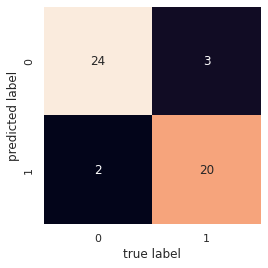

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        26
         1.0       0.91      0.87      0.89        23

    accuracy                           0.90        49
   macro avg       0.90      0.90      0.90        49
weighted avg       0.90      0.90      0.90        49



In [ ]:
##accuaracy
def accuracy(yt, yp):
    accuracy = np.sum(yt==yp) / len(yt)
    return accuracy 

In [ ]:
print(" accuracy   :   ", accuracy(y_test,y_pred))

 accuracy   :    0.8979591836734694


In [ ]:
FP = confusion_mtx.sum(axis=0) - np.diag(confusion_mtx)  
FN = confusion_mtx.sum(axis=1) - np.diag(confusion_mtx)
TP = np.diag(confusion_mtx)
TN = confusion_mtx.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
# Precision or positive predictive value
PPV = TP/(TP+FP)
PPV

array([0.88888889, 0.90909091])

In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
TPR

array([0.92307692, 0.86956522])